In [49]:
import numpy as np  
import os  
import cv2   # opencv  
from PIL import Image   # PIL <==  pillow 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [94]:
cat_img_path =r"Data/images/cats/cat_38.jpg"
cat =Image.open(cat_img_path)

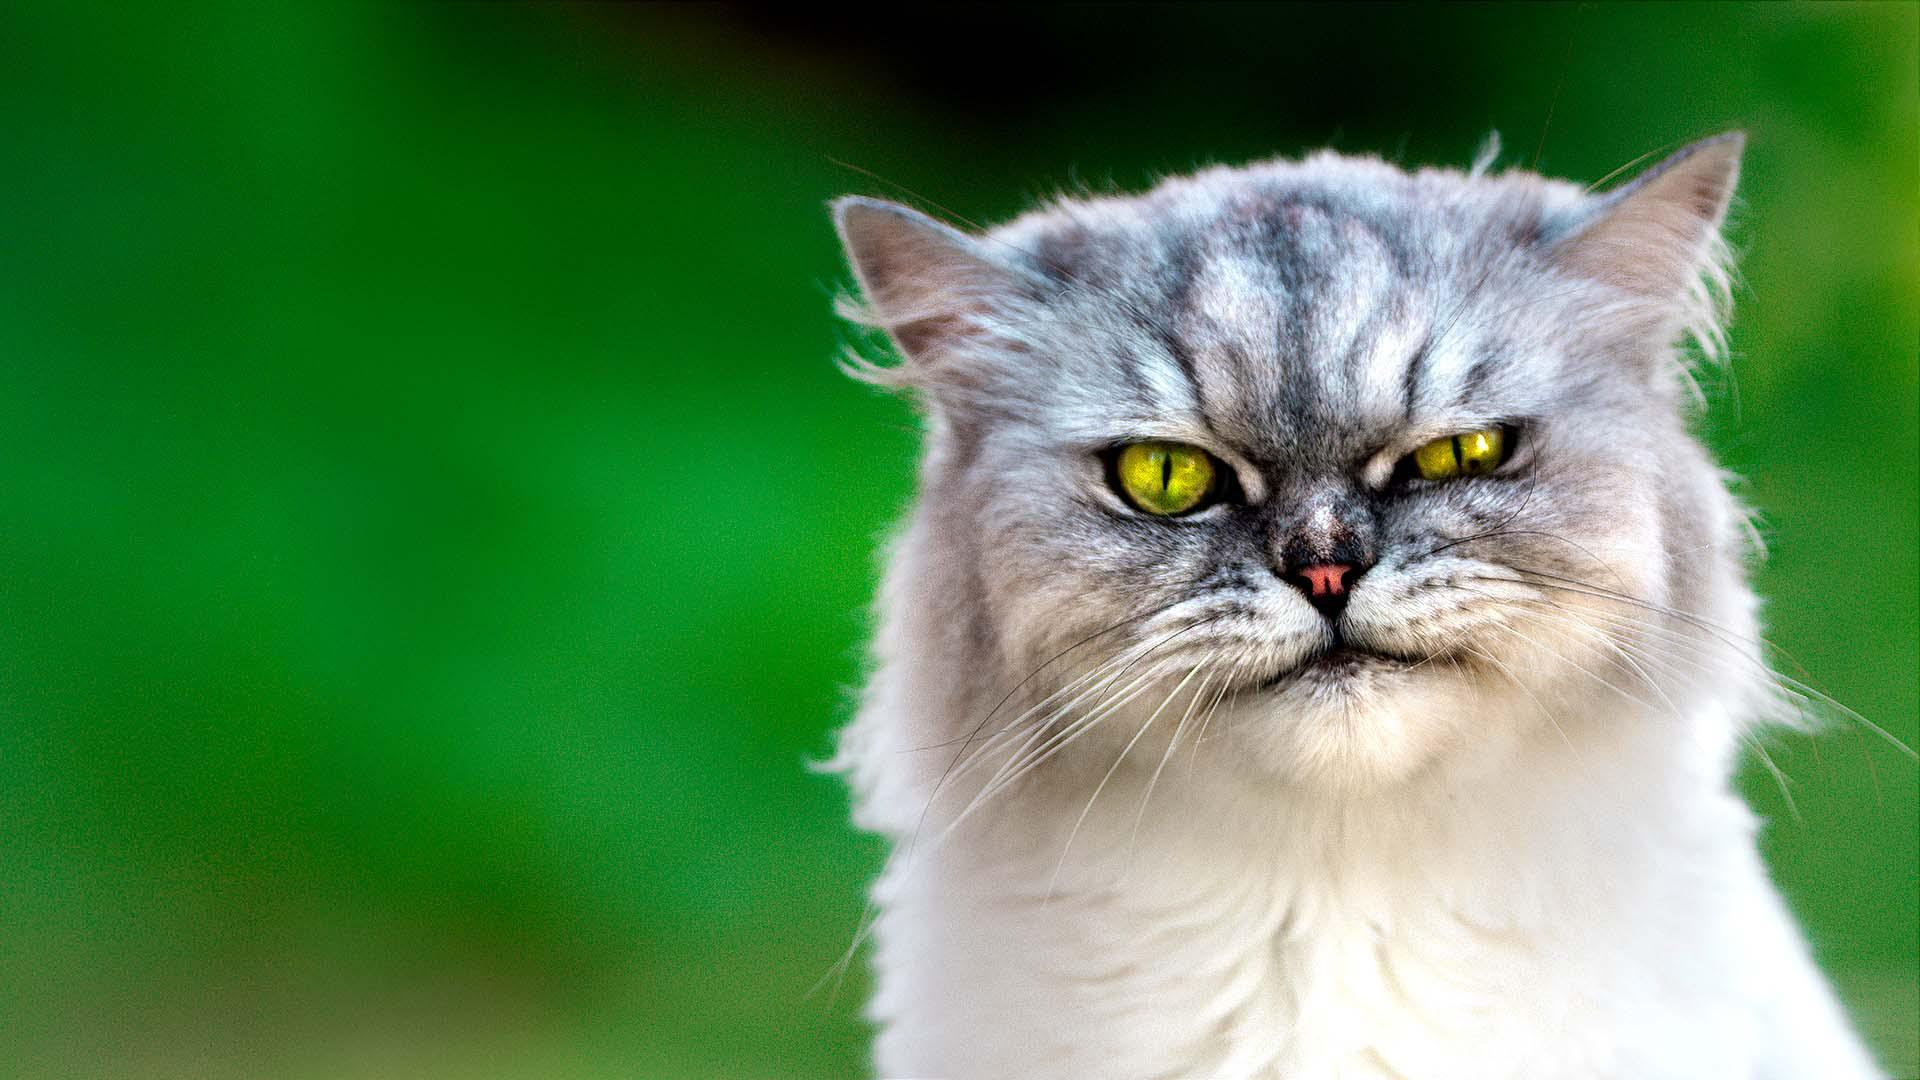

In [95]:
cat

In [52]:
type(cat)

PIL.JpegImagePlugin.JpegImageFile

In [53]:
catINPixel_form= np.array(cat)

In [54]:
catINPixel_form.ndim
# pixels values ==> 0 to 255

3

In [55]:
catINPixel_form.shape

(769, 615, 3)

In [56]:
catINPixel_form.min()

0

In [57]:
path_dict = {'cats':["Data/images/cats"],'dogs':["Data/images/dogs"]}

In [58]:
path_dict['cats']

['Data/images/cats']

In [59]:
import os

# Initialize the dictionary with directory paths
path_dict = {'cats': [], 'dogs': []}

# Base directory containing the images
base_directory = 'Data/images'

# Iterate through the cat images directory
cat_dir = os.path.join(base_directory, 'cats')
for file in os.listdir(cat_dir):
    file_path = os.path.join(cat_dir, file)
    path_dict['cats'].append(file_path)

# Iterate through the dog images directory
dog_dir = os.path.join(base_directory, 'dogs')
for file in os.listdir(dog_dir):
    file_path = os.path.join(dog_dir, file)
    path_dict['dogs'].append(file_path)

# Print the result
for image_path in path_dict['dogs']:
    image = Image.open(image_path)
    image


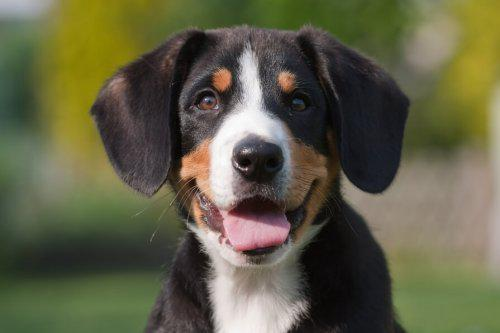

In [60]:
Image.open(path_dict['dogs'][120])

In [61]:
x = [] 
y = [] 
for class_name,paths in path_dict.items(): 
    for path in paths:  # [], [] 
        sample_img = cv2.imread(path) 
        reduced_img = cv2.resize(sample_img,(224,224))
        x.append(reduced_img) 
        y.append(class_name)        

In [62]:
len(x)   , len(y)

(697, 697)

In [63]:
set(y)  # {'cats':1, 'dogs':0}

{'cats', 'dogs'}

In [64]:
Y = []
for item in y: 
    if item == "cats":
        Y.append(1)
    else: 
        Y.append(0) 

In [65]:
Y = [1 if item == "cats" else 0 for item in y]

In [66]:
set(Y)

{0, 1}

In [67]:
type(Y)

list

In [68]:
X = np.array(x) 
Y = np.array(Y)

In [69]:
X.ndim 

4

In [70]:
type(X)   , type(Y)  

(numpy.ndarray, numpy.ndarray)

In [71]:
X.shape  

# 697 images  
# size  224 height , 224 width , 3channel (rgb) 

(697, 224, 224, 3)

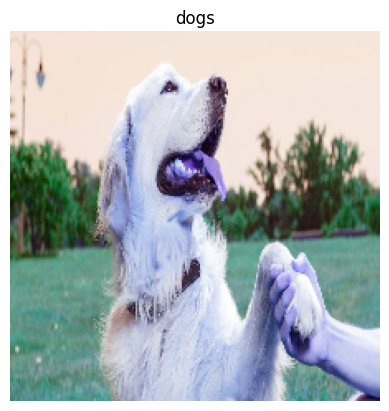

In [72]:
plt.imshow(X[455]) 
plt.title(y[455])
plt.axis('off')
plt.show() 

In [73]:
x[455].shape 

(224, 224, 3)

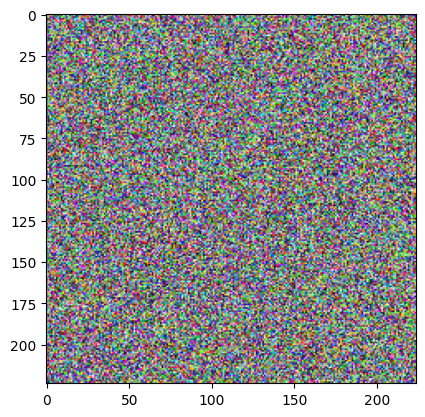

In [74]:
plt.imshow(np.random.randint(0,255,(224,224,3)))

In [75]:
# 0  -  255  ==> 0 - 1  
X = X/255.0   # minmax scaler 

In [76]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler 

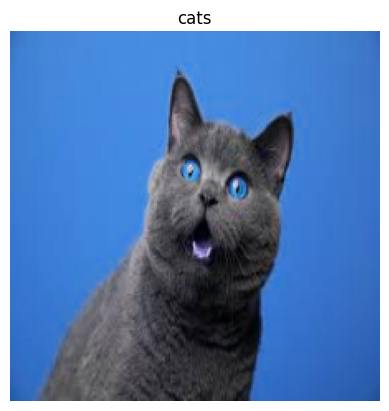

In [77]:
plt.imshow(x[255]) 
plt.title(y[255])
plt.axis('off')
plt.show() 

# pixel range 0 -- 255 

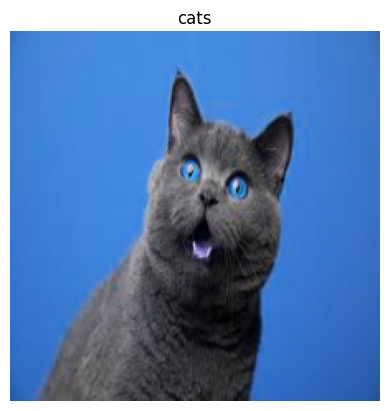

In [78]:
plt.imshow(X[255])   
plt.title(y[255])
plt.axis('off')
plt.show() 

# pixel range 0 -- 1 

In [79]:
##  training testing 
from sklearn.model_selection import  train_test_split 

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=42)

In [81]:
### Cnn model defining  
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Conv2D,  

In [82]:
x_train[0].shape 

(224, 224, 3)

In [83]:
cnn_model = Sequential([
    # Convolutional layers
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(40, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(30, (3,3), activation='relu'),

    #flattening layer
    layers.Flatten(),

    # Dense layers for classification
    layers.Dense(45, activation='relu'),
    layers.Dense(24, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary for a detailed overview
cnn_model.summary()

C:\Users\tanma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 40)   │        23,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 30)     │        10,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 81120)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 45)             │     3,650,445 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,687,276 (14.07 MB)

 Trainable params: 3,687,276 (14.07 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
### Model training 
history = cnn_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 582ms/step - accuracy: 0.5072 - loss: 0.8727 - val_accuracy: 0.4381 - val_loss: 0.6936
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 950ms/step - accuracy: 0.5416 - loss: 0.6918 - val_accuracy: 0.6762 - val_loss: 0.6917
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 981ms/step - accuracy: 0.6312 - loss: 0.6904 - val_accuracy: 0.4762 - val_loss: 0.7047
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5529 - loss: 0.6793 - val_accuracy: 0.4476 - val_loss: 0.7195
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 922ms/step - accuracy: 0.6391 - loss: 0.6343 - val_accuracy: 0.5333 - val_loss: 0.7014


In [85]:
# history dataframe 
# cnn_model.predict() 
# confusion_matrix()  
# classification report  
# model save

<Axes: >

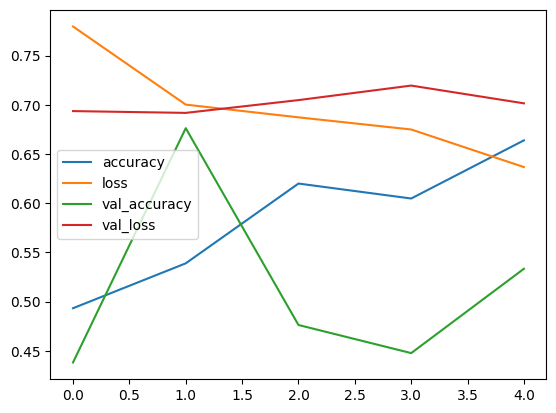

In [86]:
import pandas as pd 
pd.DataFrame(history.history).plot()

In [87]:
## prediction  
prediction = cnn_model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step


In [88]:
prediction.shape   , x_test.shape 

((105, 1), (105, 224, 224, 3))

In [89]:
pred = (prediction >0.5).astype(int).ravel()

In [90]:
pred 

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [91]:
compare_df = pd.DataFrame({"Actual":y_test,"prediction":pred})
compare_df.head() 

Actual  prediction
0       1           0
1       0           0
2       0           0
3       1           1
4       1           1

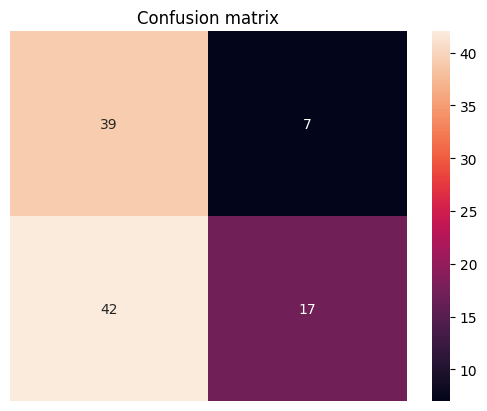


Classification report!
              precision    recall  f1-score   support

           0       0.48      0.85      0.61        46
           1       0.71      0.29      0.41        59

    accuracy                           0.53       105
   macro avg       0.59      0.57      0.51       105
weighted avg       0.61      0.53      0.50       105



In [92]:
## confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report 
matrix = confusion_matrix(compare_df['Actual'],compare_df['prediction'])

sns.heatmap(matrix,annot=True , fmt='d') 
plt.title("Confusion matrix")
plt.axis('off')
plt.show() 


### classification report  
print()
print("Classification report!")
print(classification_report(compare_df['Actual'],compare_df['prediction']))

In [93]:
### saving the objects 
import os  
os.makedirs('prediction',exist_ok=True) 
os.makedirs('models',exist_ok=True) 
# compare_df['Actual'].map()

compare_df.to_csv('./prediction/predicted.csv',index=False) 
cnn_model.save('./models/cnn_model.h5') 
print("successfully saved your models! ")


successfully saved your models! 
